In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

0.5583570552828954
0.00022625367617679082
0.130141420882483


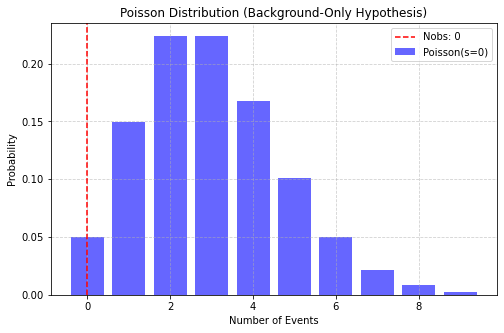

In [2]:
# Define background expectation (mean of Poisson distribution)
background_mean = 3 

background_signal_mean = 0

nobs= 0 

# Generate possible event counts
x_values = np.arange(0, background_signal_mean + 10)  # Range of possible counts

poisson_s0_pmf = stats.poisson.pmf(x_values, background_mean)  # Compute Poisson PMF
poisson_s20_pmf = stats.poisson.pmf(x_values, background_mean+700)  # Compute Poisson PMF
poisson_s40_pmf = stats.poisson.pmf(x_values, background_mean+500)  # Compute Poisson PMF

print(stats.poisson.cdf(3, 3.4))
print(1-stats.poisson.cdf(15-1, 5))
print(stats.poisson.cdf(7-1, 5+5))


# Plot the Poisson distribution
plt.figure(figsize=(8,5))
plt.bar(x_values, poisson_s0_pmf, color='blue', alpha=0.6, label=f'Poisson(s={0})')
plt.axvline(nobs, color="red", linestyle="--", label=f"Nobs: {nobs}")
    
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution (Background-Only Hypothesis)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


Upper limit on signal events at 95% CL: 2169.6493
Upper limit on cross-section at 95% CL: 0.0491 pb


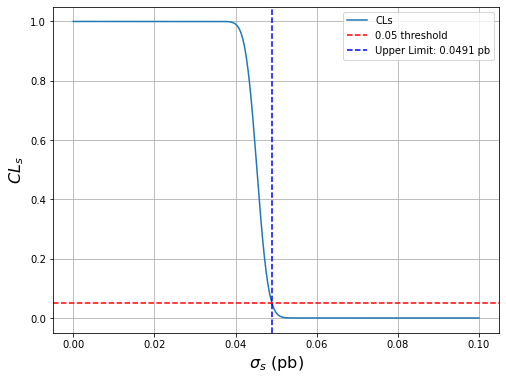

In [12]:
# Inputs
N_obs = 9800  # Observed number of events
b_expected = 7800  # Expected background
b_uncertainty = 10  # Absolute background uncertainty
luminosity = 196400 #196400 # Integrated luminosity in pb^-1
ref_xs = 1 #reference cross section at 1 pb 
s_ref = ref_xs*luminosity
efficiency = 0.225  # Signal efficiency

# Define signal cross-section scan range
#sigma_s_values = np.linspace(0, 1.0, 100)  # Cross-section scan (pb)
sigma_s_values = np.linspace(0, 0.1, 500)  # Cross-section scan (pb)


# Function to compute CLs
def compute_cls(sigma_s, b, sigma_b, N_obs, lumi, eff):
    s = sigma_s * lumi * eff  # Compute signal yield
    p_b = stats.poisson.sf(N_obs, b)  # P(N >= N_obs | b) (Poisson tail)
    p_sb = stats.poisson.cdf(N_obs, s+b)  # P(N = N_obs | s+b)  
    #print("signal:", s, "p_sb:", p_sb) #/ (1 - p_b))
    return p_sb /(1 - p_b) # CLs = p_sb / (1 - p_b)
    
        
# Compute CLs for different cross-sections
cls_values = np.array([compute_cls(sigma, b_expected, b_uncertainty, N_obs, luminosity, efficiency) 
                       for sigma in sigma_s_values])

# Find upper limit where CLs drops below 0.05
cl_threshold = 0.05
below_threshold = np.where(cls_values <= cl_threshold)[0]

if len(below_threshold) > 0:
    sigma_upper_limit = sigma_s_values[below_threshold[0]]
    sigma_upper_limit_Xs = (sigma_upper_limit * luminosity * efficiency) #* lumi * eff 
    print(f"Upper limit on signal events at 95% CL: {sigma_upper_limit_Xs:.4f}")
    print(f"Upper limit on cross-section at 95% CL: {sigma_upper_limit:.4f} pb")
else:
    sigma_upper_limit = None
    print("No upper limit found within the scanned range.")

# Plot CLs vs. cross-section
plt.figure(figsize=(8, 6))
plt.plot(sigma_s_values, cls_values, label="CLs")
plt.axhline(cl_threshold, color="red", linestyle="--", label="0.05 threshold")

if sigma_upper_limit is not None:
    plt.axvline(sigma_upper_limit, color="blue", linestyle="--", label=f"Upper Limit: {sigma_upper_limit:.4f} pb")

plt.xlabel(r"$\sigma_s$ (pb)", fontsize=16)
plt.ylabel(r"$CL_s$", fontsize=16)
plt.legend()
plt.grid()
plt.show()
